In [3]:
data = '/Users/smaran/Downloads/combined_data.csv'

In [4]:
# for data
import pandas as pd
import numpy as np

# for visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud


# nltk used for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv(data)
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [6]:
X=df['text']
y=df['label']

In [7]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score,accuracy_score,classification_report

In [11]:
model = MultinomialNB()
model.fit(X_train_features,y_train)

MultinomialNB()

In [12]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 98.25638874741604 %
Accuracy on test data: 97.55542240862792 %


MultinomialNB()
For  NB
Accuracy: 0.9755542240862792
Precision: 0.9866279069767442

Confusion Matrix:
[[7797  115]
 [ 293 8485]]


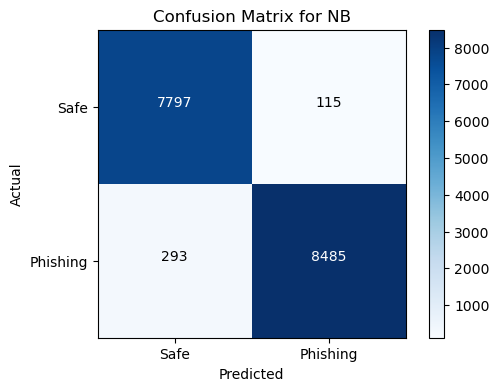


SVC(gamma=1.0, kernel='sigmoid')
For  SVC
Accuracy: 0.9675254643499102
Precision: 0.965205603253502

Confusion Matrix:
[[7604  308]
 [ 234 8544]]


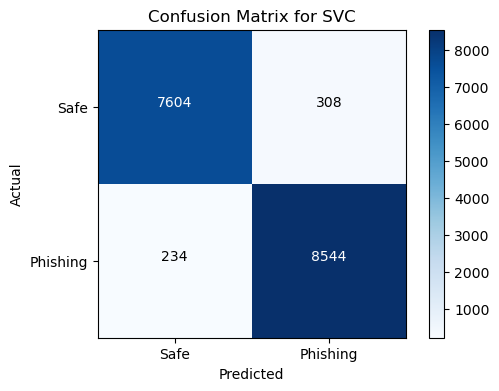


DecisionTreeClassifier(max_depth=5)
For  DT
Accuracy: 0.854823247453565
Precision: 0.7930462049248364

Confusion Matrix:
[[5668 2244]
 [ 179 8599]]


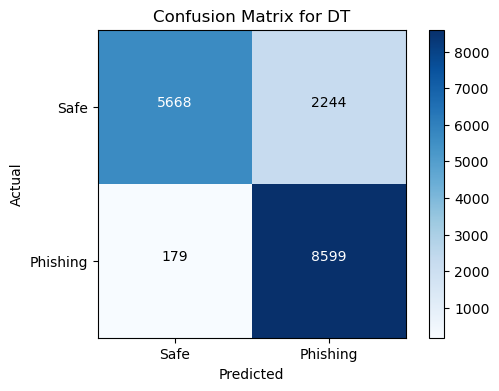


LogisticRegression(penalty='l1', solver='liblinear')
For  LR
Accuracy: 0.9798082684242061
Precision: 0.9708802856186545

Confusion Matrix:
[[7651  261]
 [  76 8702]]


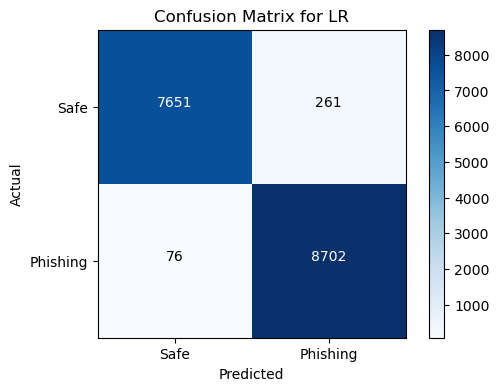


RandomForestClassifier(n_estimators=50, random_state=2)
For  RF
Accuracy: 0.9820850808867585
Precision: 0.9853463079564968

Confusion Matrix:
[[7784  128]
 [ 171 8607]]


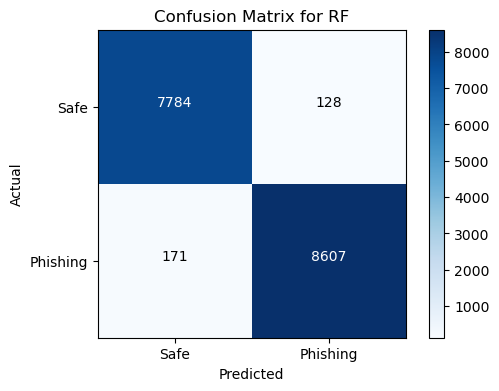

/Users/smaran/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=2)
For  AdaBoost
Accuracy: 0.9403834631515878
Precision: 0.9239568580455387

Confusion Matrix:
[[7214  698]
 [ 297 8481]]


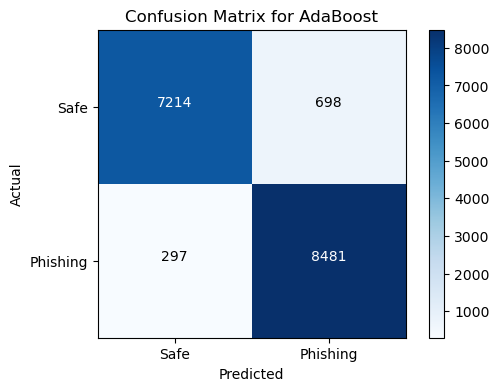


BaggingClassifier(n_estimators=50, random_state=2)
For  BgC
Accuracy: 0.9755542240862792
Precision: 0.9764344262295082

Confusion Matrix:
[[7705  207]
 [ 201 8577]]


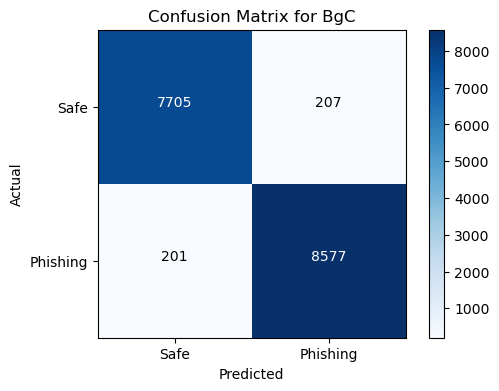


ExtraTreesClassifier(n_estimators=50, random_state=2)
For  ETC
Accuracy: 0.9816057519472738
Precision: 0.98644768577007

Confusion Matrix:
[[7794  118]
 [ 189 8589]]


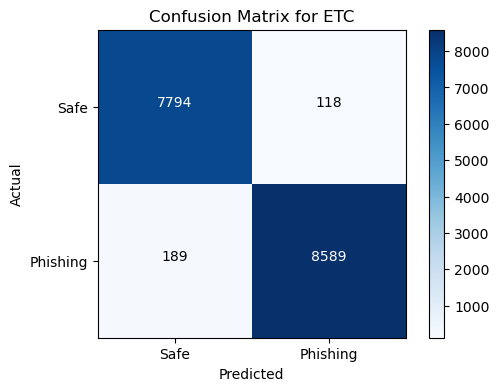


GradientBoostingClassifier(n_estimators=50, random_state=2)
For  GBDT
Accuracy: 0.910665068903535
Precision: 0.8671772649400383

Confusion Matrix:
[[6594 1318]
 [ 173 8605]]


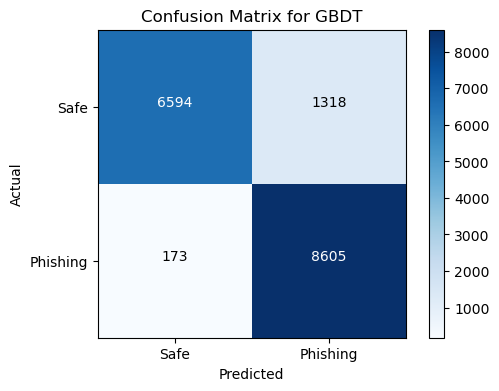


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)
For  xgb
Accuracy: 0.9695626123427202
Precision: 0.9536976080754883

Confusion Matrix:
[[7490  422]
 [  86 8692]]


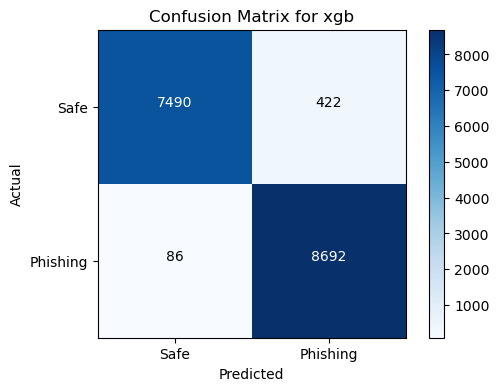

In [12]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'NB': mnb,
    'SVC' : svc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,train_X,train_y,test_X,test_y):
    print(clf.fit(train_X,train_y))
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    conf_matrix = confusion_matrix(test_y, y_pred)
    #classification_rep = classification_report(test_y, y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy,conf_matrix,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,conf_matrix,precision = train_classifier(clf,X_train_features,y_train,X_test_features,y_test)
    
    print("For ",name)
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {precision}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    conf_matrix = np.array(conf_matrix)
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    classes = ['Safe', 'Phishing']  # Replace with your actual class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = conf_matrix.max() / 2.
    for i, j in [(i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]:
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    
    #print("\nClassification Report:")
    #print(classification_rep)
    print()
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(precision)

In [23]:
from sklearn.ensemble import VotingClassifier


lrc = LogisticRegression(solver='liblinear', penalty='l1')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

eclf1 = VotingClassifier(estimators=[('RFC', rfc), ('lrc', lrc), ('ETC', etc)], voting='soft')
eclf1.fit(X_train_features,y_train)
y_pred = clf.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#classification_rep = classification_report(test_y, y_pred)
precision = precision_score(y_test ,y_pred)

print(accuracy,'\n', precision,'\n', conf_matrix)

0.9695626123427202 
 0.9536976080754883 
 [[7490  422]
 [  86 8692]]


In [24]:
from sklearn.ensemble import VotingClassifier


lrc = LogisticRegression(solver='liblinear', penalty='l1')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

eclf1 = VotingClassifier(estimators=[('RFC', rfc), ('lrc', lrc), ('ETC', etc)], voting='hard')
eclf1.fit(X_train_features,y_train)
y_pred = clf.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#classification_rep = classification_report(test_y, y_pred)
precision = precision_score(y_test ,y_pred)

print(accuracy,'\n', precision,'\n', conf_matrix)

0.9695626123427202 
 0.9536976080754883 
 [[7490  422]
 [  86 8692]]


In [13]:
#%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(X_train_features,y_train)  

prediction = mlp_classifier_model.predict(X_test_features)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))


MLP Classifier
Accuracy score: 0.99
Precision score: 0.98
Recall score: 0.99
F1 score: 0.99


/Users/smaran/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [14]:
input_your_mail = input()
input_data_features = feature_extraction.transform([input_your_mail])
prediction = mlp_classifier_model.predict(input_data_features)
if prediction[0] == 1:
    print("\n Not Safe")
else:
    print("\n Safe")

 hi how are you are you ok



 Safe


In [15]:
import pickle
pickle.dump(mlp_classifier_model,open('model.pkl','wb'))

In [9]:
pickle.dump(feature_extraction, open('tfidf_vectorizer.pkl', 'wb'))